# Connect 4 game

In [1]:
# imports
import pandas as pd
import numpy as np
import random
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib as mpl

## Create state of grid

In [2]:
state = pd.DataFrame(
    [
        [
            x+1,
            y+1,
            False,
            False,
            False,
            False
            
        ]
        for x in range(6)
        for y in range(7)
    ], columns = ['x', 'y', 'is_taken','is_red','is_yellow', 'win']
)

## Empty grid for next party

In [3]:
def empty_grid(state):
    '''
    Empty a Connect4 grid for next party

    Parameters
    ----------
    state : pd.DataFrame
    DataFrame containing each point of the grid with their state 

    Returns
    ---------
    state : pd.DataFrame
    DataFrame with with grid state reset

    '''

    for i in range(0,len(state)):
        state["is_taken"].loc[i]=False
        state["is_red"].loc[i]=False
        state["is_yellow"].loc[i]=False
        state["win"].loc[i]=False
    return state

## Find the row index associated to the element (x, y)

In [4]:
def GetRowFromXY(x, y, state):
    '''
    Using point coordinates from grid state 'state', returns the row location with the coordinates mentioned

    Pameters
    --------
    x : int
    Coordinate x of grid point
    y : int
    Coordinate y of grid point
    state : pd.DataFrame
    State of the grid

    Returns
    --------
    int
    Index of row with coordinates x, y
    '''

    value = state[(state['x'] == x) & (state['y'] == y)]
    return int(value.index[0])

## Make a random action

In [5]:
def Move(state, idplayer):
    '''
    Allows a player to make an action.

    Parameters
    ---------
    state : pd.DataFrame
      Grid state
    idplayer : int
      Identification of the player (1 or 2)

    Returns
    --------
    state : pd.DataFrame
      New grid state now that the player made its action

    '''

    ####################
    # iterate over all columns of the board
    possible_moves = []
    for y in range(1, 8):
        x = 6
        row_xy = GetRowFromXY(x, y, state)
        if not state.loc[row_xy, 'is_taken']:
            while not state.loc[row_xy, 'is_taken'] and x >= 1:
                x -= 1
                if x >= 1:
                    row_xy = GetRowFromXY(x, y, state)
            row_xy = GetRowFromXY(x+1, y, state)
            possible_moves.append(row_xy)
    ####################

    move = random.choice(possible_moves) # move is made at random
    
    state.loc[move, "is_taken"]=True
    if idplayer==1:
        state.loc[move,"is_red"]=True
    if idplayer==2:
        state.loc[move, "is_yellow"]=True

    return state

## Detect victory and return the winning cells

In [6]:
def IsVictory(state, idplayer):
    '''
    States if the player 'idplayer' has won, and if so, with what tokens.

    Parameters
    ---------
    state : pd.DataFrame
      Grid state
    idplayer : int
      Identification of the player (1 or 2)

    Returns
    --------
    win : bool
      States if player 'idplayer' won or not
    list_positions_win : list
      If the player has won, returns the positions of the 4 winning tokens ; else, is empty
    '''
    end_col = 8
    end_row = 7

    if idplayer == 1:
        color = 'is_red'
    else:
        color = 'is_yellow'

    win = False
    list_positions_win = []

    # victory with horizontal locations
    for c in range(1, end_col-3):
        for r in range(1, end_row):
            first = GetRowFromXY(r, c, state)
            second = GetRowFromXY(r, c+1, state)
            third = GetRowFromXY(r, c+2, state)
            fourst = GetRowFromXY(r, c+3, state)
            if state.loc[first, color] and state.loc[second, color] and state.loc[third, color] and state.loc[fourst, color]:
                win = True
                list_positions_win = [first, second, third, fourst]


    # victory with vertical locations
    for c in range(1, end_col):
        for r in range(1, end_row-3):
            first = GetRowFromXY(r, c, state)
            second = GetRowFromXY(r+1, c, state)
            third = GetRowFromXY(r+2, c, state)
            fourst = GetRowFromXY(r+3, c, state)
            if state.loc[first, color] and state.loc[second, color] and state.loc[third, color] and state.loc[fourst, color]:
                win = True
                list_positions_win = [first, second, third, fourst]
            

    # victory with diagonal locations /
    for c in range(1, end_col-3):
        for r in range(1, end_row-3):
            first = GetRowFromXY(r, c, state)
            second = GetRowFromXY(r+1, c+1, state)
            third = GetRowFromXY(r+2, c+2, state)
            fourst = GetRowFromXY(r+3, c+3, state)
            if state.loc[first, color] and state.loc[second, color] and state.loc[third, color] and state.loc[fourst, color]:
                win = True
                list_positions_win = [first, second, third, fourst]

    # victory with diagonal locations \
    for c in range(1, end_col-3):
        for r in range(4, end_row):
            first = GetRowFromXY(r, c, state)
            second = GetRowFromXY(r-1, c+1, state)
            third = GetRowFromXY(r-2, c+2, state)
            fourst = GetRowFromXY(r-3, c+3, state)
            if state.loc[first, color] and state.loc[second, color] and state.loc[third, color] and state.loc[fourst, color]:
                win = True
                list_positions_win = [first, second, third, fourst]

    return win, list_positions_win

## Know how a party ended

In [7]:
def End_Party(state):
    '''
    Returns the state of the party.

    Parameters
    --------
    state : pd.DataFrame
      State of the grid

    Returns
    --------
    str
      Indicates is the party has been won or should continue
    '''
  
    win = False
    defeat = False

    win_first_player, win_positions_first_player = IsVictory(state, 1)
    win_second_player, win_positions_second_player = IsVictory(state, 2)

    if win_first_player or win_second_player:
        if win_positions_first_player:
            for pos in win_positions_first_player:
                state.loc[pos, 'win'] = True
        if win_positions_second_player:
            for pos in win_positions_second_player:
                state.loc[pos, 'win'] = True
        return("Party won")
    if not win_first_player and not win_second_player:
        return("Party continues")

## Party simulation (random choices)

In [8]:
def Party(state):
    '''
    Simulate a party of Connect4.

    Pamaters
    --------
    state : pd.DataFrame
    State of the grid

    Returns
    --------
    new_state : pd.DataFrame
    New state of the grid
    end_party : str
    Status of the party
    '''

    idplayer=1
    end_party="Party continues"
    step = 0

    while end_party =="Party continues" and step < 42:
        new_state = Move(state, idplayer)
        end_party = End_Party(state)
        idplayer += 1
        step += 1

        if idplayer==3:
            idplayer=1

    if end_party=="Party continues":
        end_party="Party lost"

    return new_state, end_party

In [9]:
fin_state, end_final = Party(state)

In [10]:
fin_state

,x,y,is_taken,is_red,is_yellow,win
0,1,1,True,False,True,False
1,1,2,False,False,False,False
2,1,3,True,False,True,False
3,1,4,True,True,False,False
4,1,5,True,True,False,False
5,1,6,True,True,False,False
6,1,7,True,False,True,False
7,2,1,True,True,False,False
8,2,2,False,False,False,False
9,2,3,True,False,True,True


## Plot the final board

In [11]:
def preprocessing_plot(state):
    '''
    Construct matrix for plotting and retrieve winning cells

    Parameters
    ---------
    state : pd.DataFrame
      State of the grid

    Returns
    ---------
    M_final : np.array
      Array of grid state
    win : list
      List of winning tokens

    '''
    
    win = []
    M = []
    for x in range(1, 7):
        inter = []
        for y in range(1, 8):
            value_index = GetRowFromXY(x, y, state)
            if state.loc[value_index,'is_red']:
                inter.append(2)
            elif state.loc[value_index,'is_yellow']:
                inter.append(1)
            else:
                inter.append(3)
            if state.loc[value_index,'win']:
                win.append((x, y))
        M.append(inter)
    M_final = np.array(M)
    return M_final, win

In [12]:
def highlight_cell(x,y, ax=None, **kwargs):
    '''
    Highlight consecutive cells in graph

    Parameters
    ----------
    x : int
      Coordinate x of point
    y : int
      Coordinate y of point
    ax :

    Returns 
    ---------
    rect : plt.Rectange
      Rectangle of highlighting

    '''
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

In [13]:
def plot(state):
    '''
    Plot the state of the grid

    Parameters
    ---------
    state : pd.DataFrame
      Grid state

    Returns
    --------
    plt
      Plot of the grid
    '''

    cdict = {
    'red'  :  ((0., 1., 1.), (0.3, 0., 1.), (1., 1., 1.)),
    'green':  ((0., 0., 1.), (0.6, 0.0, 0.), (1., 1., 1.)),
    'blue' :  ((0., 0., 0.), (1., 0.0, 0.0), (1., 1., 1.))
    }

    my_cmap = mpl.colors.LinearSegmentedColormap('my_colormap', cdict, 3)

    M, win = preprocessing_plot(state)
    plt.matshow(M,cmap=my_cmap, origin='lower')

    for y in range(7):
        for x in range(6):
            highlight_cell(y, x, color="k", linewidth=2)

    for elem in win:
        highlight_cell(elem[1]-1, elem[0]-1, color="blue", linewidth=3)

    plt.title("The board")

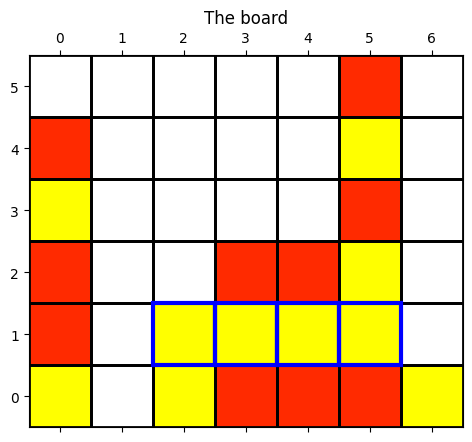

In [14]:
plot(fin_state)

In [15]:
state = empty_grid(state)
# state

/tmp/ipykernel_16678/375306395.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

# Q-Learning

In [16]:
def MoveToken(action, state, idplayer):
    '''
    Move tokens in a way compatible with QL.

    Parameters
    ---------
    action : int
      Slot to put the token in
    state : pd.DataFrame
      State of the grid
    idplayer : int
      ID of the player

    Return
    ---------
    state : pd.DataFrame
      State of the updated grid
    newplace : int
      Place of the token put in the grid
    reward : int
      Reward of the action
    end_party : str
      Status of the party
    '''
    end_party="Party continues"
    reward = 0
    
    end_row = 0
    y = action
    x = 6
    row_xy = GetRowFromXY(x, y, state)
    if not state.loc[row_xy, 'is_taken']:
        while not state.loc[row_xy, 'is_taken'] and x >= 1:
            x -= 1
            if x >= 1:
                row_xy = GetRowFromXY(x, y, state)
        row_xy = GetRowFromXY(x+1, y, state)
        end_row = row_xy
    
        state.loc[end_row, "is_taken"] = True
        if idplayer==1:
            state.loc[end_row,"is_red"]=True
        if idplayer==2:
            state.loc[end_row, "is_yellow"]=True

        end_party = End_Party(state)
        if end_party == "Party won":
            reward = 1
    else:
        reward = -1
        
    new_place = row_xy
    return state, new_place, reward, end_party

In [17]:
def ChooseAction(place,epsilon,Q):
    '''
    Define action to choose according to QL.

    Parameters
    --------
    place : int
      Place of the token
    epsilon : int
      Parameter defining the amount of QL
    Q : array
      Array of rewards

    Return
    --------
    action : int
      Optimal action to take
    '''
    possible_actions = [1,2,3,4,5,6,7]

    rnd=np.random.random()
    if rnd < epsilon:
        action = np.random.choice(possible_actions)
    else:
        action = Q[place,:].argmax() + 1

    return action

In [18]:
def UpdateQ(Q, place, new_place, action, reward, alpha, gamma):
    '''
    Update the Q matrix

    Parameters
    ---------
    Q : array
      Array of rewards
    place : int
      Place of Q at t
    new_place : int
     Place of Q at t+1
    action : int
      Action to take according to QL
    reward : int
      Reward of the action
    alpha : int
      Parameter used to update Q
    gamma : int
      Parameter used to update Q
    '''
    firstterm=(1-alpha)*Q[place,action]
    secondterm=gamma*Q[new_place,:].max()
    thirdterm=alpha*(reward + secondterm)
    res=firstterm+thirdterm

    Q[place,action]=res

In [19]:
def GameLearning(state,Q1, Q2, epsilon1,epsilon2,alpha,gamma):
    '''
    Game learning with QL algorithm

    Parameters
    --------
    state : pd.DataFrame
      State of the grid
    Q1 : array
      Array of rewards for the player 1
    Q2 : array
      Array of rewards for the player 2
    epsilon1 : int
      Parameter defining the extent of QL for player 1
    epsilon2 : int
      Parameter defining the extent of QL for player 2
    alpha : int
      Parameter used to update Q/Q1/Q2
    gamma : int 
      Parameter used to update Q/Q1/Q2

    '''
    place = 0 # initialisation
    idplayer=1
    end_party="Party continues"
    step = 0

    while end_party =="Party continues":
        if idplayer == 1:
            epsilon = epsilon1
            Q = Q1
        else:
            epsilon = epsilon2
            Q = Q2

        action = ChooseAction(place, epsilon, Q)

        new_state, new_place, reward, end_party = MoveToken(action, state, idplayer)
        UpdateQ(Q, place, new_place, action-1, reward, alpha, gamma)
        state = new_state
        place = new_place


        idplayer += 1 
        step += 1
        if idplayer==3:
            idplayer=1

    if end_party=="Party continues":
        end_party="Party lost"

    return state, end_party
  

In [20]:
alpha=0.01 # learning rate
gamma=0.9 # discount factor
epsilon1=0.3 # probability of exploration we want to get at the end
epsilon2=1 # probability of exploration we want to get at the end
state = empty_grid(state)
Q1=np.zeros((42,7))
Q2=np.zeros((42,7))
fin_state, end = GameLearning(state, Q1, Q2, epsilon1, epsilon2, alpha, gamma)

/tmp/ipykernel_16678/375306395.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_16678/375306395.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

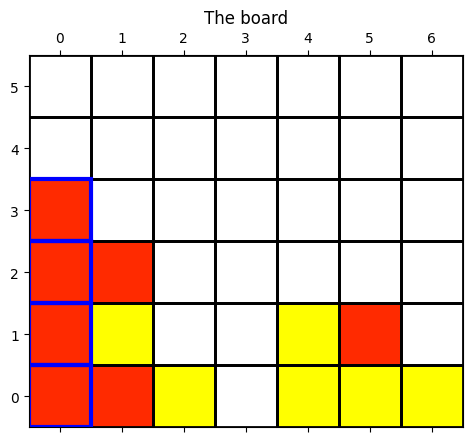

In [21]:
plot(fin_state)

The red tokens (first player) are played by QL, while the yellow tokens (second player) are set randomly. We can see that QL is much more efficient than random placement of the token, and allows the player of the red tokens to easily win the game.